# Classying IMDB Movie Reviews with Keras


In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load and inspect data

Discard rare words via num_words
Variables are lists of reviews (each review is a list of word indices, which encode a sequence of words)
Labels are lists of 0s and 1s where 0 is a negative review and 1 is a positive review

In [2]:
#min_word_freq = 10000
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=min_word_freq)


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Inspect first 19 elements of the first review and the corresponding label:

In [3]:
print(train_data[0][:20], train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25] 1


### Bonus: decode integer sequences back to sentences


In [4]:
# dictionary mapping words to integer index
word_index = imdb.get_word_index()

# map integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decode review: note indices were offset by 3 (0, 1, 2 reserved for 'padding', 'start of sequence' and 'unknown')
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Prepare data

Convert lists of integers to tensors by one-hot-encoding to vectors of length min_word_freq of 0s and 1s. Another option is to pad lists to same length then use `Embedding` layer as first layer in network. 

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #this sets specific indices to 1s
        
    return results

#### Encode integer sequences

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_test[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

#### Encode labels

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_test

array([ 1.,  1.,  1., ...,  1.,  0.,  1.], dtype=float32)

## Build network

Input data are vectors
Target data are scalars (1s and 0s)

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Compile model and configure loss and optimizer


In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Split a validation set from the training set (for use during training)

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
len(x_train[1])

10000

## Fit model

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3221 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.1031 - acc: 0.9692 - val_loss: 0.3045 - val_acc: 0.8848
Epoch 8/20
15000/15000 [==============================] - 1s 

## Plot train and val losses

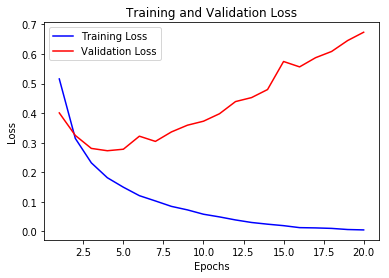

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot train and val accuracy

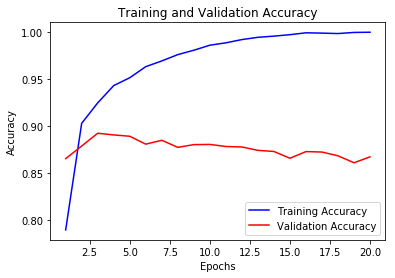

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Train new model for 4 epochs

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s - loss: 0.5299 - acc: 0.7712 - val_loss: 0.4351 - val_acc: 0.8282
Epoch 2/4
15000/15000 [==============================] - 1s - loss: 0.3149 - acc: 0.9005 - val_loss: 0.3117 - val_acc: 0.8846
Epoch 3/4
15000/15000 [==============================] - 1s - loss: 0.2303 - acc: 0.9252 - val_los

## Evaluate model on test set

In [16]:
results = model.evaluate(x_test, y_test)
results

24960/25000 [============================>.] - ETA: 0s

[0.29251944693565368, 0.88395999999999997]

In [17]:
model.predict(x_test)

array([[ 0.94102699],
       [ 0.79343414],
       [ 0.99759918],
       ..., 
       [ 0.6361922 ],
       [ 0.02018126],
       [ 0.84359813]], dtype=float32)